# Impulse response equivalence

In this notebook we explore the equivalence between the two-layer model and a two-timescale impulse response approach.

In [1]:
from openscm_twolayermodel import ImpulseResponseModel, TwoLayerModel

/Users/znicholls/Documents/AGCEC/MCastle/openscm-twolayermodel/src/openscm_twolayermodel/base.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


TODO:

- check signs of stuff

## Background

Following [Geoffroy et al., 2013, Part 2](https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-12-00196.1), with notation altered to match our implementation, the two-layer model with efficacy ($\epsilon$) and state-dependent climate feedback can be written as

\begin{align}
C \frac{dT}{dt} & = F - (\lambda_0 + a T) T - \epsilon \eta (T - T_D) \\
C_D \frac{dT_D}{dt} & = \eta (T - T_D)
\end{align}

If the state-dependent feedback factor, $a$, is non-zero, the two-layer model and impulse response approaches are not equivalent. However, if $a=0$, they become the same.

Hereafter we assume $a=0$, however this assumption should not be forgotten. In the case $a=0$, the two-layer model can be written (adding an $\epsilon$ for the deep-ocean equation too for simplicity later).

\begin{align}
C \frac{dT}{dt} & = F - \lambda_0 T - \epsilon \eta (T - T_D) \\
\epsilon C_D \frac{dT_D}{dt} & = \epsilon \eta (T - T_D)
\end{align}

In matrix notation we have

\begin{align}
\frac{d\mathbf{X}}{dt} = \mathbf{A} \mathbf{X} + \mathbf{B}
\end{align}

where $\mathbf{X} = \begin{pmatrix}T \\T_D\end{pmatrix}$, $\mathbf{A} = \begin{bmatrix} - \frac{\lambda_0 + \epsilon \eta}{C} & \frac{\epsilon \eta}{C} \\ \frac{\epsilon \eta}{\epsilon C_d} & -\frac{\epsilon \eta}{\epsilon C_d} \end{bmatrix}$ and $\mathbf{B} = \begin{pmatrix} \frac{F}{C} \\ 0 \end{pmatrix}$.

As shown in [Geoffroy et al., 2013, Part 1](https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-12-00195.1), $\mathbf{A}$ can be diagonalised i.e. written in the form $\mathbf{A} = \mathbf{\Phi} \mathbf{D} \mathbf{\Phi}^{-1}$, where $\mathbf{D}$ is a diagonal matrix. Applying the solution given in [Geoffroy et al., 2013, Part 1](https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-12-00195.1) to our impulse response notation, we have

\begin{align}
\mathbf{D} = \begin{bmatrix} - \frac{1}{\tau_1} & 0 \\ 0 & - \frac{1}{\tau_2} \end{bmatrix}
\end{align}

and

\begin{align}
\mathbf{\Phi} = \begin{bmatrix} 1 & 1 \\ \phi_1 & \phi_2 \end{bmatrix}
\end{align}

where

\begin{align}
\tau_1 = \frac{C C_D}{2 \lambda_0 \eta} (b - \sqrt{\delta})
\end{align}

\begin{align}
\tau_2 = \frac{C C_D}{2 \lambda_0 \eta} (b + \sqrt{\delta})
\end{align}

\begin{align}
\phi_1 = \frac{C}{2 \epsilon \eta} (b^* - \sqrt{\delta})
\end{align}

\begin{align}
\phi_2 = \frac{C}{2 \epsilon \eta} (b^* + \sqrt{\delta})
\end{align}

\begin{align}
b = \frac{\lambda_0 + \epsilon \eta}{C} + \frac{\eta}{C_D}
\end{align}

\begin{align}
b^* = \frac{\lambda_0 + \epsilon \eta}{C} - \frac{\eta}{C_D}
\end{align}

\begin{align}
\delta = b^2 - 4 \frac{\lambda_0 \eta}{C C_D}
\end{align}

Given this, we can re-write the system as

\begin{align}
\frac{d\mathbf{X}}{dt} &= \mathbf{\Phi} \mathbf{D} \mathbf{\Phi}^{-1} \mathbf{X} + \mathbf{B} \\
\mathbf{\Phi}^{-1}\frac{d\mathbf{X}}{dt} &= \mathbf{D} \mathbf{\Phi}^{-1} \mathbf{X} + \mathbf{\Phi}^{-1} \mathbf{B} \\
\frac{d\mathbf{Y}}{dt} &= \mathbf{D} \mathbf{Y} + \mathbf{\Phi}^{-1} \mathbf{B} \\
\end{align}

Defining $\mathbf{Y} = \begin{pmatrix} T_1 \\ T_2 \end{pmatrix}$, we have

\begin{align}
\frac{d}{dt} \begin{pmatrix} T_1 \\ T_2 \end{pmatrix} = \begin{bmatrix} - \frac{1}{\tau_1} & 0 \\ 0 & - \frac{1}{\tau_2} \end{bmatrix} \begin{pmatrix} T_1 \\ T_2 \end{pmatrix} + \frac{1}{\phi_2 - \phi_1}\begin{bmatrix} \phi_2 & -1 \\ -\phi_1 & 1 \end{bmatrix} \begin{pmatrix} \frac{F}{C} \\ 0 \end{pmatrix}
\end{align}

or, 

\begin{align}
\frac{dT_1}{dt} & = \frac{-T_1}{\tau_1} + \frac{\phi_2}{\phi_2 - \phi_1} \frac{F}{C} \\
\frac{dT_2}{dt} & = \frac{-T_2}{\tau_2} - \frac{\phi_1}{\phi_2 - \phi_1} \frac{F}{C}
\end{align}

Re-writing, we have,

\begin{align}
\frac{dT_1}{dt} & = \frac{1}{\tau_1} \left( \frac{\tau_1 \phi_2}{\phi_2 - \phi_1} \frac{F}{C} - T_1 \right) \\
\frac{dT_2}{dt} & = \frac{1}{\tau_2} \left( \frac{-\tau_2 \phi_1}{\phi_2 - \phi_1} \frac{F}{C} - T_2 \right)
\end{align}

We can compare this to the notation of [Millar et al., 2017](https://doi.org/10.5194/acp-17-7213-2017) and see that

\begin{align}
d_1 = \tau_1 \\
d_2 = \tau_2 \\
q_1 = \frac{\tau_1 \phi_2}{C(\phi_2 - \phi_1)} \\
q_2 = - \frac{\tau_2 \phi_1}{C(\phi_2 - \phi_1)} \\
\end{align}

Hence we have redemonstrated the equivalence of the two-layer model and a two-timescale impulse response model. Given the parameters of the two-layer model, we can now trivially derive the equivalent parameters of the two-timescale model. Doing the reverse is possible, but requires some more work in order to make a useable route drop out.

The first step is to follow [Geoffroy et al., 2013, Part 1](https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-12-00195.1), and define two extra constants

\begin{align}
a_1 = \frac{\phi_2 \tau_1}{C(\phi_2 - \phi_1)} \lambda_0 \\
a_2 = - \frac{\phi_1 \tau_2}{C(\phi_2 - \phi_1)} \lambda_0 \\
\end{align}

These constants have the useful property that $a_1 + a_2 = 1$ (proof in Appendix A). 

From above, we also see that 

\begin{align}
a_1 = \lambda_0 q_1 \\
a_2 = \lambda_0 q_2 \\
\end{align}

Hence 

\begin{align}
a_1 + a_2 = \lambda_0 q_1 + \lambda_0 q_2 = 1 \\
\lambda_0 = \frac{1}{q_1 + q_2}
\end{align}

Next we calculate $C$ via

\begin{align}
\frac{q_1}{d_1} + \frac{q_2}{d_2} &= \frac{\phi_2}{C(\phi_2 - \phi_1)} - \frac{\phi_1}{C(\phi_2 - \phi_1)} = \frac{1}{C} \\
C &= \frac{d_1 d_2}{q_1 d_2 + q_2 d_1}
\end{align}

We then use further relationships from Table 1 of [Geoffroy et al., 2013, Part 1](https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-12-00195.1) (proof is left to the reader) to calculate the rest of the constants.

Firstly,

\begin{align}
\tau_1 a_1 + \tau_2 a_2 = \frac{C + \epsilon C_D}{\lambda_0} \\
\epsilon C_D = \lambda_0 (\tau_1 a_1 + \tau_2 a_2) - C
\end{align}

and then finally,

\begin{align}
\tau_1 a_1 + \tau_2 a_2 = \frac{C + \epsilon C_D}{\lambda_0} \\
\epsilon \eta = \frac{\epsilon C_D}{\tau_1 a_2 + \tau_2 a_1}
\end{align}

The final thing to notice here is that $C_D$, $\epsilon$ and $\eta$ are not uniquely-defined. This makes sense, as shown by [Geoffroy et al., 2013, Part 2](https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-12-00196.1), the introduction of the efficacy factor does not alter the behaviour of the system (it is still the same mathematical system) and so it is impossible for simply the two-timescale temperature response to uniquely define all three of these quantities. It can only define the products $\epsilon C_D$ and $\epsilon \eta$. Hence when translating from the two-timescale model to the two-layer model with efficacy, an explicit choice for the efficacy must be made. This does not alter the temperature response but it does alter the implied ocean heat uptake of the two-timescale model. 

Long story short, when deriving two-layer model parameters from a two-timescale model, one must specify the efficacy.

Given that $\mathbf{Y} = \mathbf{\Phi}^{-1} \mathbf{X}$ i.e. $\mathbf{X} = \mathbf{\Phi} \mathbf{Y}$, we can also relate the impulse response boxes to the two layers.

\begin{aligned}
 \begin{pmatrix} T \\ T_D \end{pmatrix} = \begin{bmatrix} 1 & 1 \\ \phi_1 & \phi_2 \end{bmatrix} \begin{pmatrix} T_1 \\ T_2 \end{pmatrix} \\
 \begin{pmatrix} T \\ T_D \end{pmatrix} = \begin{pmatrix} T_1 + T_2 \\ \phi_1 T_1 + \phi_2 T_2 \end{pmatrix}
\end{aligned}

Finally, the equivalent of the two-timescale and two-layer models allows us to also calculate the heat uptake of a two-timescale impulse response model. It is given by

\begin{aligned}
\text{Heat uptake} &= C \frac{dT}{dt} + C_D \frac{dT_D}{dt} \\
&= F - \lambda_0 T + (1 - \epsilon) \eta (T - T_D) \\
&= F - \lambda_0 (T_1 + T_2) + (1 - \epsilon) \eta ((1 - \phi_1) T_1 - (1 - \phi_2) T_2) \\
&= F - \lambda_0 (T_1 + T_2) - \eta (\epsilon - 1)((1 - \phi_1) T_1 - (1 - \phi_2) T_2)
\end{aligned}

## Running the code

Here we actually run the two implementations to explore their similarity.

In [2]:
import datetime as dt

import numpy as np
import pandas as pd
import openscm_units.unit_registry as ur
from scmdata.run import ScmRun, df_append

from openscm_twolayermodel import ImpulseResponseModel, TwoLayerModel

import matplotlib.pyplot as plt

First we define a scenario to run.

In [3]:
time = np.arange(1750, 2501)
forcing = (
    0.05 * np.sin(time / 15 * 2 * np.pi) + 3.0 * time / time.max()
)

inp = ScmRun(
    data=forcing,
    index=time,
    columns={
        "scenario": "test_scenario",
        "model": "unspecified",
        "climate_model": "junk input",
        "variable": "Effective Radiative Forcing",
        "unit": "W/m^2",
        "region": "World",
    },
)
inp

<scmdata.ScmRun (timeseries: 1, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	        scenario        model climate_model                     variable  \
	0  test_scenario  unspecified    junk input  Effective Radiative Forcing   
	
	    unit region  
	0  W/m^2  World  

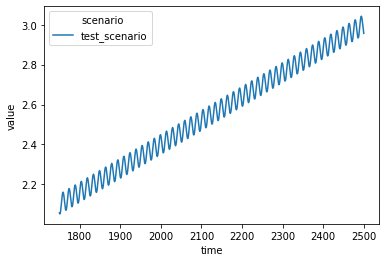

In [4]:
inp.lineplot()

Next we run the two-layer model. In order for it to be convertible to a two-timescale model, we must turn state-dependence off (a=0).

In [5]:
two_layer_config = {
    "du": 55 * ur("m"),
    "efficacy": 1.2 * ur("dimensionless"),
#     "efficacy": 1.0 * ur("dimensionless"),
    "a": 0 * ur("W/m^2/delta_degC^2"),
}

In [6]:
twolayer = TwoLayerModel(**two_layer_config)
res_twolayer = twolayer.run_scenarios(inp)
res_twolayer

<scmdata.ScmRun (timeseries: 4, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	          model       scenario region                     variable  \
	7   unspecified  test_scenario  World  Effective Radiative Forcing   
	8   unspecified  test_scenario  World    Surface Temperature|Upper   
	9   unspecified  test_scenario  World    Surface Temperature|Lower   
	10  unspecified  test_scenario  World                  Heat Uptake   
	
	          unit  run_idx  efficacy (dimensionless)  \
	7        W/m^2        0                       1.2   
	8   delta_degC        0                       1.2   
	9   delta_degC        0                       1.2   
	10       W/m^2        0                       1.2   
	
	    lambda_0 (watt / delta_degree_Celsius / meter ** 2) climate_model  \
	7                                            1.246667       two_layer   
	8                                            1.246667       two_layer   
	9                               

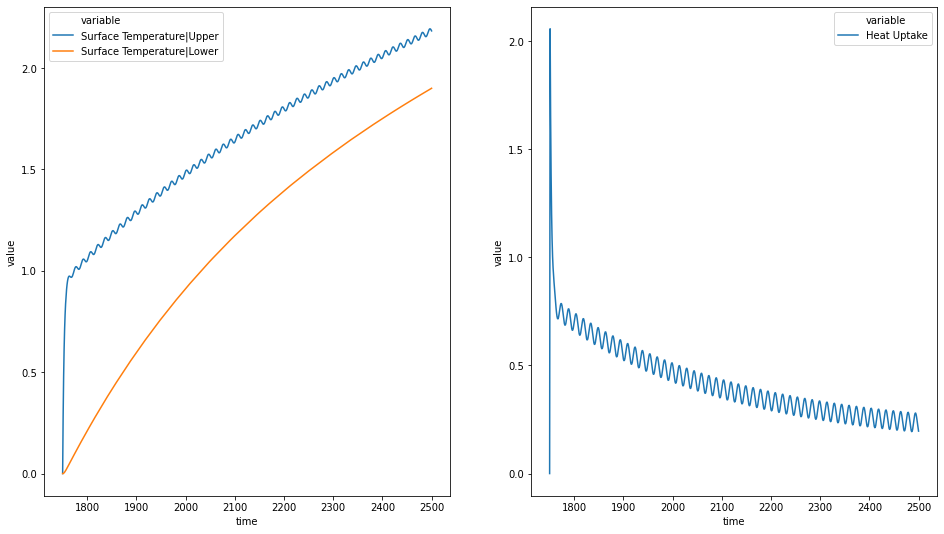

In [7]:
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
res_twolayer.filter(variable="*Temperature*").lineplot(hue="variable", ax=ax)

ax = fig.add_subplot(122)
res_twolayer.filter(variable="Heat Uptake").lineplot(hue="variable", ax=ax)

Next we get the parameters with which we get the equivalent impulse response model.

In [8]:
two_timescale_paras = twolayer.get_impulse_response_parameters()
two_timescale_paras

{'d1': 103454323.57029569 <Unit('joule / watt')>,
 'd2': 11181891933.114195 <Unit('joule / watt')>,
 'q1': 0.4465999986742509 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
 'q2': 0.3555390387589074 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
 'efficacy': 1.2 <Unit('dimensionless')>}

In [9]:
impulse_response = ImpulseResponseModel(
    **two_timescale_paras
)
res_impulse_response = impulse_response.run_scenarios(inp)
res_impulse_response

<scmdata.ScmRun (timeseries: 5, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	          model       scenario region                     variable  \
	18  unspecified  test_scenario  World  Effective Radiative Forcing   
	19  unspecified  test_scenario  World    Surface Temperature|Box 1   
	20  unspecified  test_scenario  World    Surface Temperature|Box 2   
	21  unspecified  test_scenario  World          Surface Temperature   
	22  unspecified  test_scenario  World                  Heat Uptake   
	
	          unit  run_idx  efficacy (dimensionless)  d2 (joule / watt)  \
	18       W/m^2        0                       1.2       1.118189e+10   
	19  delta_degC        0                       1.2       1.118189e+10   
	20  delta_degC        0                       1.2       1.118189e+10   
	21  delta_degC        0                       1.2       1.118189e+10   
	22       W/m^2        0                       1.2       1.118189e+10   
	
	               

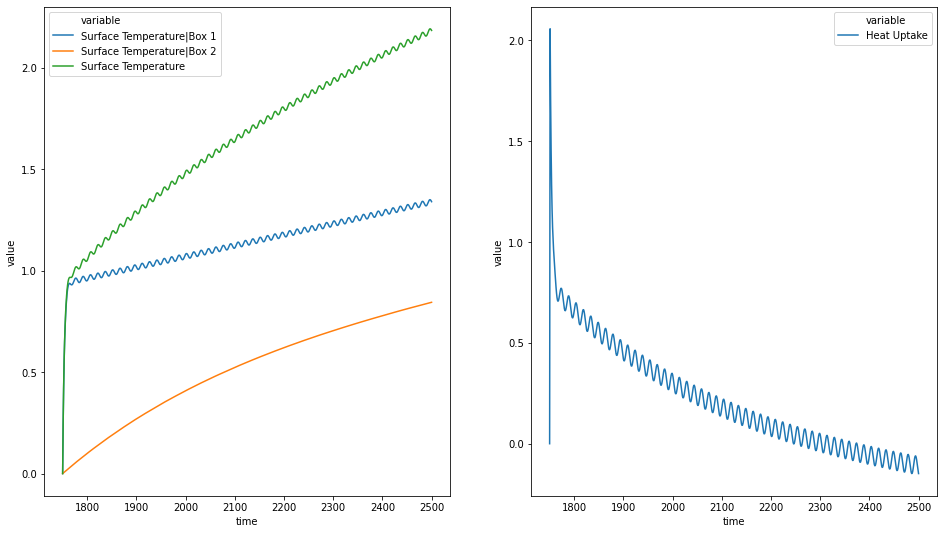

In [10]:
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
res_impulse_response.filter(variable="*Temperature*").lineplot(hue="variable", ax=ax)

ax = fig.add_subplot(122)
res_impulse_response.filter(variable="Heat Uptake").lineplot(hue="variable", ax=ax)

We can compare the two responses as well.

In [11]:
# TODO: ask Jared why this hack is needed
tmp = pd.concat([res_impulse_response.timeseries().reset_index(), res_twolayer.timeseries().reset_index()], axis=0)

def is_time(x):
    try:
        x.year
        return True
    except AttributeError:
        return False
    
    
time_cols = tmp.columns.map(lambda x: hasattr(x, "year"))
meta_cols = tmp.columns[~(time_cols.values.astype(bool))].tolist()
tmp = tmp.set_index(meta_cols)
tmp

1750-01-01 00:00:00  \
model       scenario      region variable                    unit       run_idx efficacy (dimensionless) d2 (joule / watt) climate_model                  d1 (joule / watt) q1 (delta_degree_Celsius * meter ** 2 / watt) q2 (delta_degree_Celsius * meter ** 2 / watt) lambda_0 (watt / delta_degree_Celsius / meter *... eta (watt / delta_degree_Celsius / meter ** 2) du (meter) a (watt / delta_degree_Celsius ** 2 / meter ** 2) dl (meter)                        
unspecified test_scenario World  Effective Radiative Forcing W/m^2      0       1.2                      1.118189e+10      two_timescale_impulse_response 1.034543e+08      0.4466                                        0.355539                                      NaN                                                NaN                                            NaN        NaN                                               NaN                    2.056699   
                                 Surface Temperature|Box 1   delta_degC 0       1.2                      1.118189e+10      two_timescale_impulse_response 1.034543e+08      0.4466                                        0.355539                                      NaN                                                NaN                                            NaN        NaN                                               NaN                    0.000000   
                                 Surface Temperature|Box 2   delta_degC 0       1.2                      1.118189e+10      two_timescale_impulse_response 1.034543e+08      0.4466                                        0.355539                                      NaN                                                NaN                                            NaN        NaN                                               NaN                    0.000000   
                                 Surface Temperature         delta_degC 0       1.2                      1.118189e+10      two_timescale_impulse_response 1.034543e+08      0.4466                                        0.355539                                      NaN                                                NaN                                            NaN        NaN                                               NaN                    0.000000   
                                 Heat Uptake                 W/m^2      0       1.2                      1.118189e+10      two_timescale_impulse_response 1.034543e+08      0.4466                                        0.355539                                      NaN                                                NaN                                            NaN        NaN                                               NaN                    0.000000   
                                 Effective Radiative Forcing W/m^2      0       1.2                      NaN               two_layer                      NaN               NaN                                           NaN                                           1.246667                                           0.8                                            55.0       0.0                                               1200.0                 2.056699   
                                 Surface Temperature|Upper   delta_degC 0       1.2                      NaN               two_layer                      NaN               NaN                                           NaN                                           1.246667                                           0.8                                            55.0       0.0                                               1200.0                 0.000000   
                                 Surface Temperature|Lower   delta_degC 0       1.2                      NaN               two_layer                      NaN               NaN                                           NaN                                           1.246667                                         

In [12]:
# TODO: get Jared to check why this fails
# combined = df_append([res_impulse_response, res_twolayer])
combined = ScmRun(tmp)
combined

<scmdata.ScmRun (timeseries: 9, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	          model       scenario region                     variable  \
	23  unspecified  test_scenario  World  Effective Radiative Forcing   
	24  unspecified  test_scenario  World    Surface Temperature|Box 1   
	25  unspecified  test_scenario  World    Surface Temperature|Box 2   
	26  unspecified  test_scenario  World          Surface Temperature   
	27  unspecified  test_scenario  World                  Heat Uptake   
	28  unspecified  test_scenario  World  Effective Radiative Forcing   
	29  unspecified  test_scenario  World    Surface Temperature|Upper   
	30  unspecified  test_scenario  World    Surface Temperature|Lower   
	31  unspecified  test_scenario  World                  Heat Uptake   
	
	          unit  run_idx  efficacy (dimensionless)  \
	23       W/m^2        0                       1.2   
	24  delta_degC        0                       1.2   
	25  delta

In [13]:
assert False, "check heat uptake below, should be the same..."

AssertionError: check heat uptake below, should be the same...

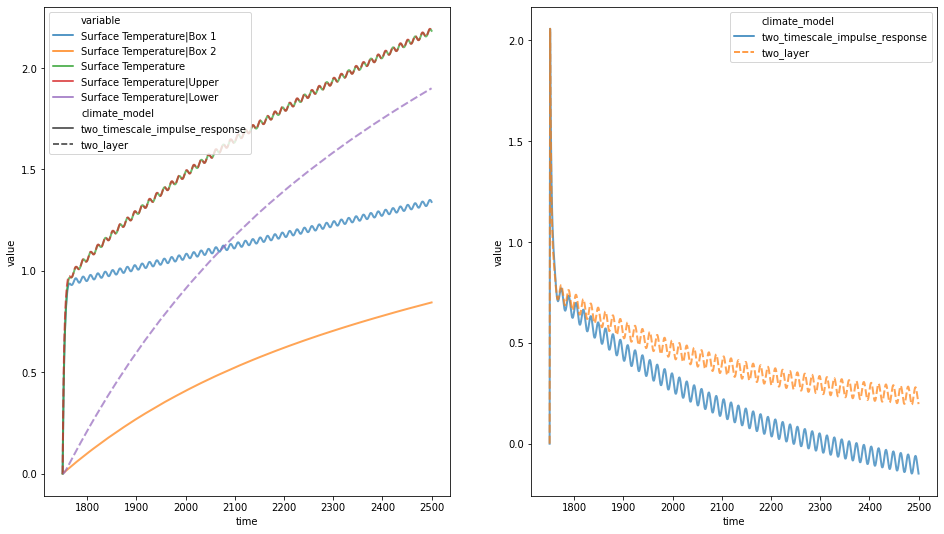

In [14]:
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
combined.filter(variable="*Temperature*").lineplot(hue="variable", style="climate_model", alpha=0.7,  linewidth=2, ax=ax)
ax.legend(loc="upper left")

ax = fig.add_subplot(122)
combined.filter(variable="Heat Uptake").lineplot(hue="climate_model", style="climate_model", alpha=0.7, linewidth=2, ax=ax)

## Appendix A

We begin with the definitions of the $a$ constants,

\begin{align}
a_1 = \frac{\phi_2 \tau_1}{C(\phi_2 - \phi_1)} \lambda_0 \\
a_2 = - \frac{\phi_1 \tau_2}{C(\phi_2 - \phi_1)} \lambda_0 \\
\end{align}

We then have

\begin{align}
a_1 + a_2 &= \frac{\phi_2 \tau_1}{C(\phi_2 - \phi_1)} \lambda_0 - \frac{\phi_1 \tau_2}{C(\phi_2 - \phi_1)} \lambda_0 \\
&= \frac{\lambda_0}{C(\phi_2 - \phi_1)} (\phi_2 \tau_1 - \phi_1 \tau_2)
\end{align}

Recalling the definition of the $\phi$ parameters, 

\begin{align}
\phi_1 = \frac{C}{2 \epsilon \eta} (b^* - \sqrt{\delta})
\end{align}

\begin{align}
\phi_2 = \frac{C}{2 \epsilon \eta} (b^* + \sqrt{\delta})
\end{align}

We have,

\begin{align}
\phi_2 - \phi_1 = \frac{C \sqrt{\delta}}{\epsilon \eta}
\end{align}
Recalling the definition of the $\tau$ parameters, 

\begin{align}
\tau_1 = \frac{C C_D}{2 \lambda_0 \eta} (b - \sqrt{\delta})
\end{align}

\begin{align}
\tau_2 = \frac{C C_D}{2 \lambda_0 \eta} (b + \sqrt{\delta})
\end{align}

We have, 

\begin{align}
\phi_2 \tau_1 - \phi_1 \tau_2 &= \frac{C}{2 \epsilon \eta} (b^* + \sqrt{\delta}) \times \frac{C C_D}{2 \lambda_0 \eta} (b - \sqrt{\delta}) - \frac{C}{2 \epsilon \eta} (b^* - \sqrt{\delta}) \times \frac{C C_D}{2 \lambda_0 \eta} (b + \sqrt{\delta}) \\
&= \frac{C^2 C_d}{4 \epsilon \eta^2 \lambda_0} \left[ (b^* + \sqrt{\delta}) (b - \sqrt{\delta}) - (b^* - \sqrt{\delta}) (b + \sqrt{\delta}) \right] \\
&= \frac{C^2 C_d}{4 \epsilon \eta^2 \lambda_0} \left[ b^*b + b\sqrt{\delta} -b^*\sqrt{\delta} - \delta - bb^* + b\sqrt{\delta} - b^*\sqrt{\delta} + \delta \right] \\
&= \frac{C^2 C_d}{2 \epsilon \eta^2 \lambda_0} \left[ b\sqrt{\delta} -b^*\sqrt{\delta} \right] \\
&= \frac{C^2 C_d \sqrt{\delta}}{2 \epsilon \eta^2 \lambda_0} \left[ b -b^*\right]
\end{align}

Recalling the definition of the $b$ parameters, 

\begin{align}
b = \frac{\lambda_0 + \epsilon \eta}{C} + \frac{\eta}{C_D}
\end{align}

\begin{align}
b^* = \frac{\lambda_0 + \epsilon \eta}{C} - \frac{\eta}{C_D}
\end{align}

We then have

\begin{align}
\phi_2 \tau_1 - \phi_1 \tau_2 &= \frac{C^2 C_d \sqrt{\delta}}{2 \epsilon \eta^2 \lambda_0} \left[ \frac{2\eta}{C_D} \right] \\
&= \frac{C^2 \sqrt{\delta}}{\epsilon \eta \lambda_0} 
\end{align}

Putting it all back together,

\begin{align}
a_1 + a_2 &= \frac{\lambda_0}{C(\phi_2 - \phi_1)} (\phi_2 \tau_1 - \phi_1 \tau_2) \\
&= \frac{\lambda_0}{C} \frac{\epsilon \eta}{C \sqrt{\delta}} \frac{C^2 \sqrt{\delta}}{\epsilon \eta \lambda_0} \\
&= 1
\end{align}